In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib
import os

In [38]:
# Load the dataset
df = pd.read_csv('/content/phone_usage_india.csv')

In [39]:
df.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [40]:
df = df.drop('User ID', axis=1)

In [41]:
# Feature selection
features = ['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Calls Duration (mins/day)',
            'Number of Apps Installed', 'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
            'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)', 'Monthly Recharge Cost (INR)']
X = df[features]

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Create output folder
os.makedirs("models", exist_ok=True)

In [46]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
df_2d = pca.fit_transform(X)

In [47]:
# Dictionary to store silhouette scores
scores = {}

In [48]:
# Function to plot clusters
def plot_clusters(data_2d, labels, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=labels, palette='Set2', s=60)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

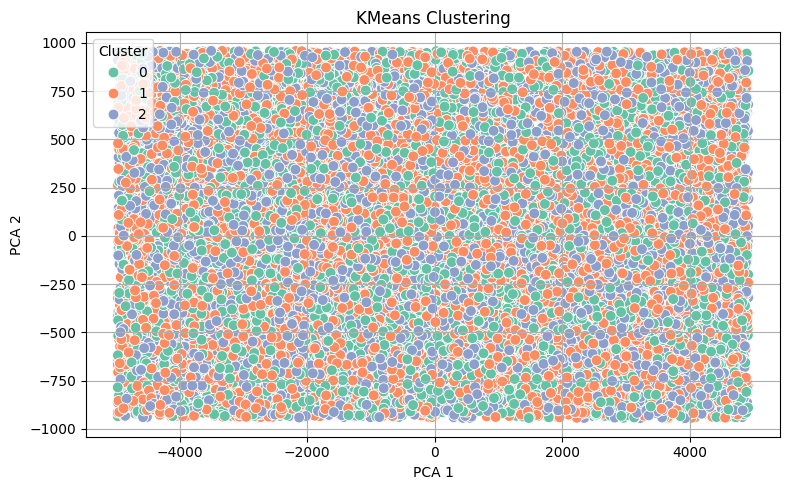

In [49]:
# 1. KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
scores['KMeans'] = silhouette_score(X_scaled, kmeans_labels)
joblib.dump(kmeans, 'models/kmeans_model.pkl')
plot_clusters(df_2d, kmeans_labels, "KMeans Clustering")

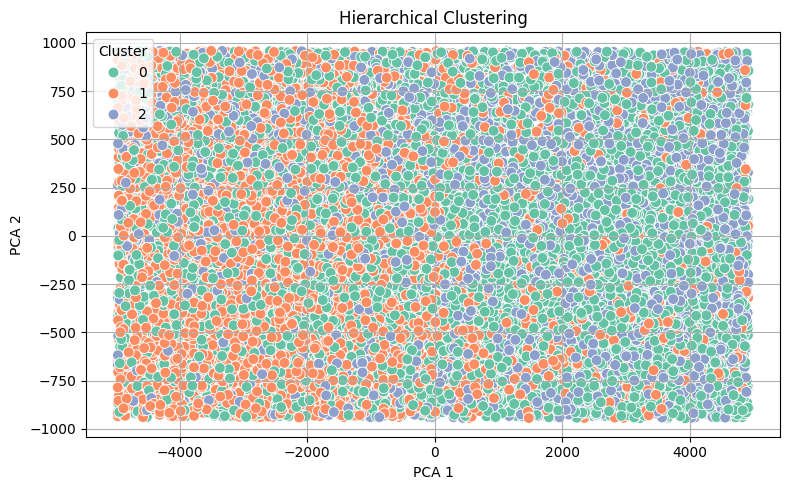

In [51]:
# 2. Hierarchical Clustering (Agglomerative)
hier = AgglomerativeClustering(n_clusters=3)
hier_labels = hier.fit_predict(X_scaled)
scores['Hierarchical'] = silhouette_score(X_scaled, hier_labels)
joblib.dump(hier, 'models/hierarchical_model.pkl')
plot_clusters(df_2d, hier_labels, "Hierarchical Clustering")

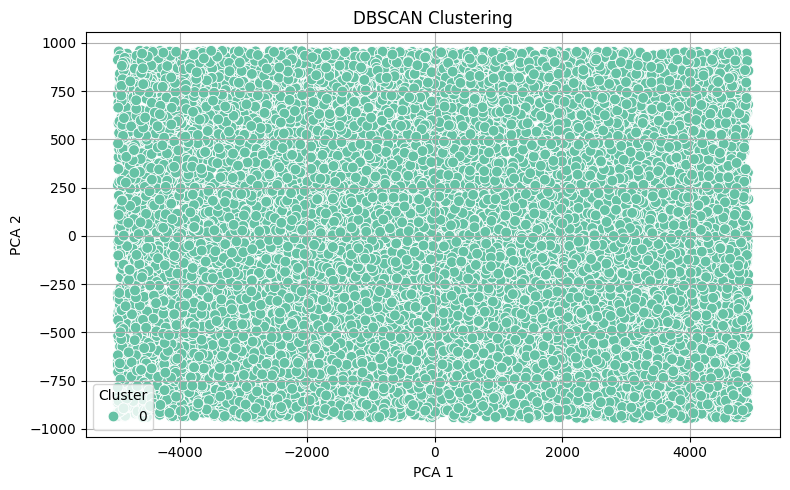

In [58]:
# 3. DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
if len(set(dbscan_labels)) > 1:
    scores['DBSCAN'] = silhouette_score(X_scaled, dbscan_labels)
else:
    scores['DBSCAN'] = -1  # Invalid score
joblib.dump(dbscan, 'models/dbscan_model.pkl')
plot_clusters(df_2d, dbscan_labels, "DBSCAN Clustering")

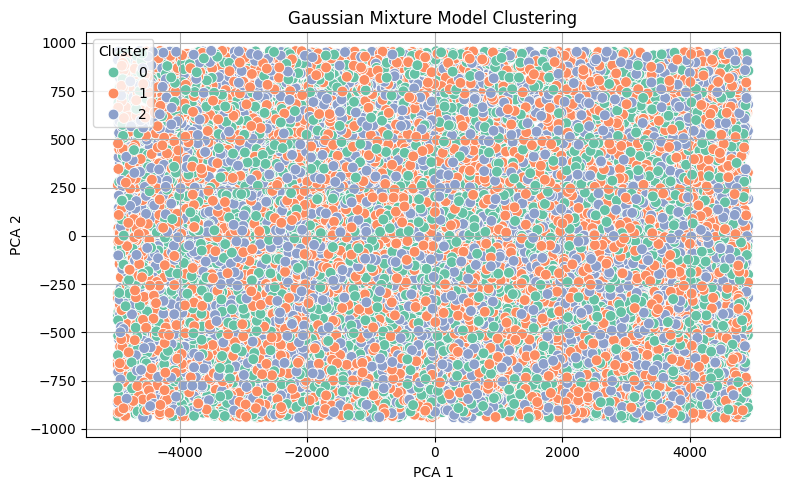

In [53]:
# 4. Gaussian Mixture
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
scores['GMM'] = silhouette_score(X_scaled, gmm_labels)
joblib.dump(gmm, 'models/gmm_model.pkl')
plot_clusters(df_2d, gmm_labels, "Gaussian Mixture Model Clustering")

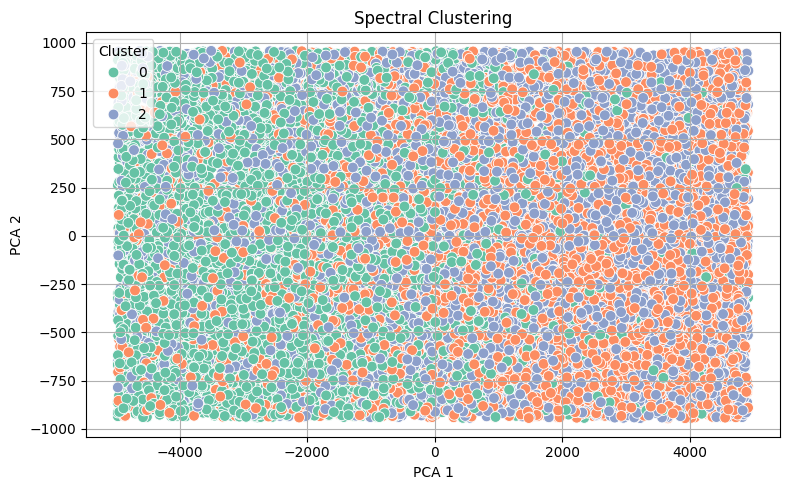

In [54]:
# 5. Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)
scores['Spectral'] = silhouette_score(X_scaled, spectral_labels)
joblib.dump(spectral, 'models/spectral_model.pkl')
plot_clusters(df_2d, spectral_labels, "Spectral Clustering")

In [59]:
# Save scores to CSV
score_df = pd.DataFrame(list(scores.items()), columns=['Model', 'Silhouette Score'])
score_df.to_csv('models/silhouette_scores.csv', index=False)

In [60]:
# Print scores
print("\nSilhouette Scores:")
print(score_df)


Silhouette Scores:
          Model  Silhouette Score
0        KMeans          0.072284
1  Hierarchical          0.021222
2        DBSCAN         -1.000000
3           GMM          0.070008
4      Spectral          0.063898


In [61]:
# Best Model
best_model = score_df.loc[score_df['Silhouette Score'].idxmax()]
print(f"\n🏆 Best Model: {best_model['Model']} with a Silhouette Score of {best_model['Silhouette Score']:.4f}")


🏆 Best Model: KMeans with a Silhouette Score of 0.0723
